In [1]:
import os
import torch
import torchvision as tv
import numpy as np
from torch.utils.data import DataLoader
from torchvision import models
import torch.nn as nn
from utils import makedirs, tensor2cuda, load_model, LabelDict
from argument import parser
from visualization import VanillaBackprop
from model.madry_model import WideResNet
import patch_dataset as patd
import matplotlib.pyplot as plt 
from skimage.color import rgb2gray
from model.resnetdsbn import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device being used:", device)

num_classes=8
model = resnet50dsbn(pretrained=False, widefactor=1)
model.fc = nn.Linear(model.fc.in_features, num_classes)

path = './checkpoint/chexpert_linf_full/checkpoint_50000.pth'
load_model(model, path)
if torch.cuda.is_available():
    model.cuda()

Device being used: cuda:0


DSBNResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): DomainSpecificBatchNorm2d(
    (bns): ModuleList(
      (0): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
    )
  )
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): TwoInputSequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): DomainSpecificBatchNorm2d(
        (bns): ModuleList(
          (0): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): DomainSpecificBatchNor

torch.Size([64, 3, 7, 7])

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

(-0.5, 6.5, 6.5, -0.5)

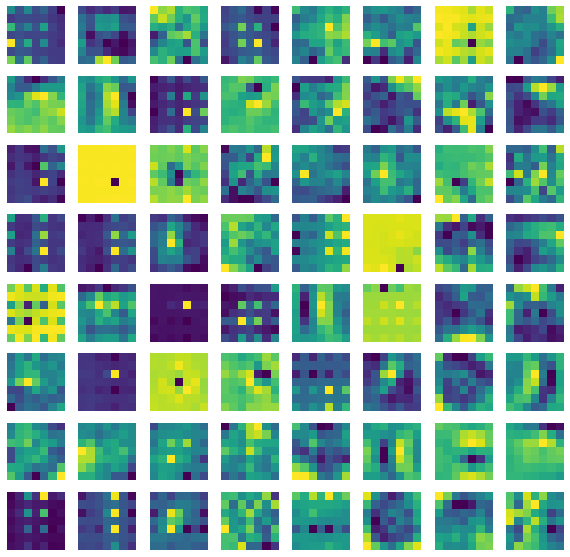

In [19]:
def normalize_frame(frame):
    frame_zero = frame - np.amin(frame)
    frame_one = frame_zero / (np.amax(frame_zero)+1e-10)
    return frame_one

layer = model.conv1
layer.weight.data.shape
fig, axs = plt.subplots(8, 8, figsize=(10,10))
counter = 0
for col in range(8):
    for row in range(8):
        ax = axs[row, col]
        kernel_ = layer.weight.data.cpu().numpy()[counter,1,:,:]
        kernel = normalize_frame(kernel_)
        im = ax.imshow(kernel)
        ax.axis('off')
        counter+=1